## Question: Do some venues host more matches overall? 
#### Analysis: The number of matches held in each location.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

venue_dataframe = pd.DataFrame()
for file in os.listdir("raw/venue_parquet"):
    single_stats = pd.read_parquet("raw/venue_parquet/" + file)
    venue_dataframe = pd.concat([venue_dataframe, single_stats], axis= 'rows', ignore_index=True)

venue_dataframe.head(10)



,match_id,city,stadium,venue_id,country
0,11673958,Bogota,Cancha Central,18338,Colombia
1,11673962,Bogota,Cancha Central,18338,Colombia
2,11673963,Bogota,Cancha Central,18338,Colombia
3,11673993,Braga,Court Central,21510,Portugal
4,11674000,Charleston,Center Court,32522,USA
5,11674008,Charleston,Center Court,32522,USA
6,11674011,Charleston,Center Court,32522,USA
7,11674026,Orleans,Central Arena,41846,France
8,11674032,Orleans,Central Arena,41846,France
9,11674034,Orleans,Central Arena,41846,France


In [2]:
# گروه‌بندی بر اساس مکان (venue_id) و شمارش تعداد مسابقات (match_id)
venue_counts = venue_dataframe.groupby(['venue_id', 'city', 'stadium']).count()['match_id'].reset_index()

# مرتب‌سازی بر اساس تعداد مسابقات میزبانی شده (بیشترین به کمترین)
venue_counts = venue_counts.sort_values(by='match_id', ascending=False)

# نمایش نتایج
print(venue_counts)


     venue_id                city               stadium  match_id
5       17612     Sharm El Sheikh               Court 3        18
64      28799     Sharm El Sheikh               Court 4        17
86      33931     Sharm El Sheikh               Court 5        12
63      26769             Beijing         Diamond Court        12
59      23891            Monastir               Court 7        11
..        ...                 ...                   ...       ...
118     41901               Nanao               Court 4         1
21      18633            Sabadell               Court 5         1
50      21510               Braga         Court Central         1
51      23358            Santarem               Court 1         1
112     39706  Kursumlijska Banja  COURT VIKTOR TROICKI         1

[131 rows x 4 columns]


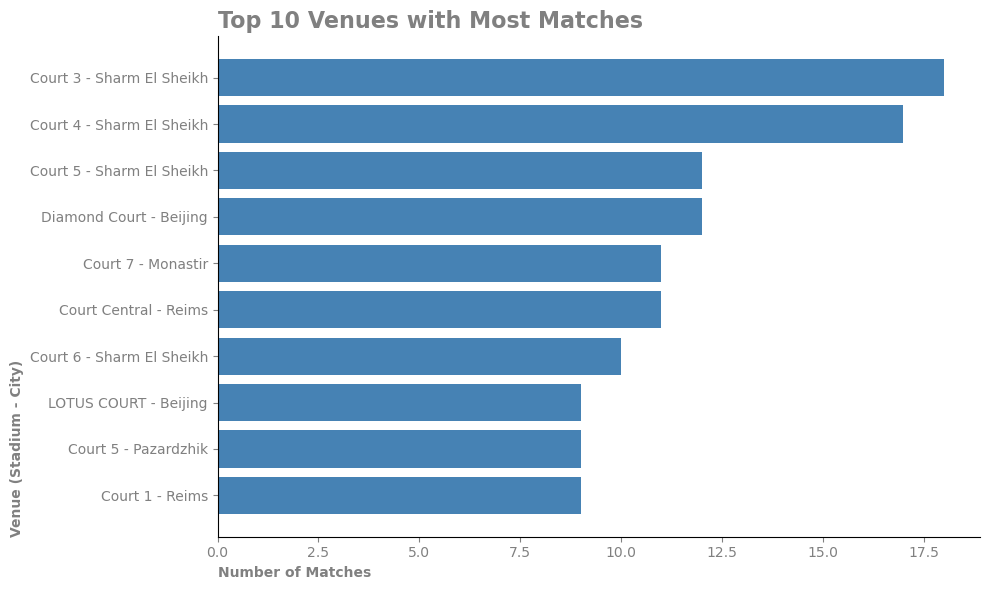

In [3]:

# گروه‌بندی و شمارش تعداد مسابقات برگزار شده در هر مکان
venue_counts = venue_dataframe.groupby(['venue_id', 'city', 'stadium']).count()['match_id'].reset_index()

# مرتب‌سازی بر اساس تعداد مسابقات و انتخاب 10 مکان اول
top_venues = venue_counts.sort_values(by='match_id', ascending=False).head(10)

# ترسیم نمودار ستونی افقی
plt.figure(figsize=(10, 6))
plt.barh(top_venues['stadium'] + " - " + top_venues['city'], top_venues['match_id'], color='#4682b4')

# برعکس کردن ترتیب محور y برای نمایش مکان‌هایی که مسابقات بیشتری داشته‌اند در بالا
plt.gca().invert_yaxis()

# اضافه کردن عنوان و برچسب‌های محورها
plt.title('Top 10 Venues with Most Matches',  fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Number of Matches', fontsize=10, color='gray', loc='left', fontweight='bold')
plt.ylabel('Venue (Stadium - City)', fontsize=10, color='gray', loc='bottom', fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(colors='gray')

# نمایش نمودار
plt.tight_layout()
plt.show()
